## Script for automated analysis of trajectories from flies in fly bowl during CsChrimson stimulation
###Project: Flp-out based CsChrimson activation of putative CX-output neurons in walking flies

In [1]:
from scipy.io import loadmat
import csv
import numpy as np
from scipy import sparse as sps

import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib import gridspec
import matplotlib.colors as colors

import os
import sys
from glob import glob
from os.path import isfile, sep

import seaborn as sns

sys.path.insert(0, '/Users/hannah/Dropbox/code/flyBowl/')
from flyBowlChrAssay_plottingFunctions import plotSparseMatrix, plotPosInRange, plotVeloHistogram,\
    veloPerTrial, veloPerTrialAverage, plotPosAndAngleInRange_singleFly_colorStim,\
    plotPosAndAngleInRange_singleFly_colorTrial, plotPosAndAngleInRange_singleFly_separateTrials,\
    plotPosAndAngleInRange_singleFly_separateTrials2,plotPosAndAngleInRange_singleFly_separateTrials3

%matplotlib inline

# Note: Additional functions are defined at the end of this script. 
# Corresponding cells need to be evaluated before running the ananlysis for the first time

### Set working directories and run basic analysis on selected experiments

In [124]:
# Single genotype analysis
rootDir = '/Volumes/jayaraman/Chuntao/Ming_FlyBowl/Lori_CsChrimson_Screen/'
analysisDir = '/Volumes/jayaraman/Hannah/Analysis_FlyBowl_forSymposium/'
lineName = '16D01'

expList = [filepath.split(sep)[-1] for filepath in glob(rootDir + sep + '*'+lineName+'*')]
sorted(expList)

['16D01_A_flyBowlMing_protocol_Chuntao_15intensity_1s_20151105T123443',
 '16D01_A_flyBowlMing_protocol_Chuntao_15intensity_1s_20151105T124824',
 '16D01_A_flyBowlMing_protocol_Chuntao_15intensity_1s_20151111T154524',
 '16D01_A_flyBowlMing_protocol_Chuntao_15intensity_1s_20151112T101341',
 '16D01_A_flyBowlMing_protocol_Chuntao_15intensity_1s_20151112T101658',
 '16D01_A_flyBowlMing_protocol_Chuntao_30intensity_1s_20151105T123953',
 '16D01_A_flyBowlMing_protocol_Chuntao_30intensity_1s_20151105T125246',
 '16D01_A_flyBowlMing_protocol_Chuntao_30intensity_1s_20151111T154951',
 '16D01_A_flyBowlMing_protocol_Chuntao_30intensity_1s_20151112T102422',
 '16D01_B_flyBowlMing_protocol_Chuntao_15intensity_1s_20151117T143706',
 '16D01_B_flyBowlMing_protocol_Chuntao_15intensity_1s_20151117T144702',
 '16D01_B_flyBowlMing_protocol_Chuntao_15intensity_1s_20151118T122757',
 '16D01_B_flyBowlMing_protocol_Chuntao_15intensity_1s_20151118T123804',
 '16D01_B_flyBowlMing_protocol_Chuntao_15intensity_1s_20151119T1

#### Note: script for basic analysis is defined below

In [125]:
fps = 30 # Video sampling rate

for currDir in range(len(expList)):
    folder = expList[currDir]
    print(folder)

    #singleExperimentAnalysis(expList[currDir])
    try:
        singleExperimentReducedAnalysis(expList[currDir])
    except:
        print('Problem with experiment')

16D01_B_flyBowlMing_protocol_Chuntao_30intensity_1s_20151118T123204

 Analysing the following log files in 16D01_B_flyBowlMing_protocol_Chuntao_30intensity_1s_20151118T123204:

['ctrax_results.mat', 'indicatordata.mat', 'jaabadetect_info.mat', 'perframefeatures_info.mat', 'protocol.mat', 'registered_trx.mat', 'registrationdata.mat', 'scores_backup_rai.mat', 'sexclassifier.mat', 'wingtracking_results.mat']
16D01_B
flyBowlMing_protocol_Chuntao_30intensity_1s_20151118T123204
Genotype folder already exists
Protocol folder already exists
Experiment folder already exists
16D01_B_flyBowlMing_protocol_Chuntao_15intensity_1s_20151117T144702

 Analysing the following log files in 16D01_B_flyBowlMing_protocol_Chuntao_15intensity_1s_20151117T144702:

['ctrax_results.mat', 'indicatordata.mat', 'jaabadetect_info.mat', 'perframefeatures_info.mat', 'protocol.mat', 'registered_trx.mat', 'registrationdata.mat', 'scores_backup_rai.mat', 'sexclassifier.mat', 'wingtracking_results.mat']
16D01_B
flyBowlMing

### Produce boxplots comparing average stimulus-triggered response of Chrimson and control flies

In [126]:
# Single genotype analysis
rootDir = '/Volumes/jayaraman/Chuntao/Ming_FlyBowl/Lori_CsChrimson_Screen/'
analysisDir = '/Volumes/jayaraman/Hannah/Analysis_FlyBowl_forSymposium/'
lineName = '16D01'

expList = [filepath.split(sep)[-1] for filepath in glob(rootDir + sep + '*'+lineName+'*')]
sorted(expList)

['16D01_A_flyBowlMing_protocol_Chuntao_15intensity_1s_20151105T123443',
 '16D01_A_flyBowlMing_protocol_Chuntao_15intensity_1s_20151105T124824',
 '16D01_A_flyBowlMing_protocol_Chuntao_15intensity_1s_20151111T154524',
 '16D01_A_flyBowlMing_protocol_Chuntao_15intensity_1s_20151112T101341',
 '16D01_A_flyBowlMing_protocol_Chuntao_15intensity_1s_20151112T101658',
 '16D01_A_flyBowlMing_protocol_Chuntao_30intensity_1s_20151105T123953',
 '16D01_A_flyBowlMing_protocol_Chuntao_30intensity_1s_20151105T125246',
 '16D01_A_flyBowlMing_protocol_Chuntao_30intensity_1s_20151111T154951',
 '16D01_A_flyBowlMing_protocol_Chuntao_30intensity_1s_20151112T102422',
 '16D01_B_flyBowlMing_protocol_Chuntao_15intensity_1s_20151117T143706',
 '16D01_B_flyBowlMing_protocol_Chuntao_15intensity_1s_20151117T144702',
 '16D01_B_flyBowlMing_protocol_Chuntao_15intensity_1s_20151118T122757',
 '16D01_B_flyBowlMing_protocol_Chuntao_15intensity_1s_20151118T123804',
 '16D01_B_flyBowlMing_protocol_Chuntao_15intensity_1s_20151119T1

In [128]:
import pandas as pd
keylist = ['genotype','protocol','trial','block','vT','vR','TI']
BoxPlotAllFlies_df = pd.DataFrame(data=np.zeros((0,len(keylist))), columns=keylist)

for currDir in range(len(expList)):
    folder = expList[currDir]
    print(folder)
    
    fileNameParts = folder.split('_')
    genotype = '_'.join(fileNameParts[0:fileNameParts.index('flyBowlMing')])
    protocolName = '_'.join(fileNameParts[fileNameParts.index('flyBowlMing'):-1])
    experiment = '_'.join(fileNameParts[fileNameParts.index('flyBowlMing'):])
    timestamp = fileNameParts[-1]
    
    try:
        boxPlotMyLine = np.load(analysisDir + genotype + sep + protocolName + sep + timestamp + sep + folder + '_boxPlot.npy')
        boxPlotMyLine = boxPlotMyLine.item()
        #plt.boxplot(perFlyAvVR,labels=blockNames);

        bpdf = pd.DataFrame.from_dict(boxPlotMyLine, orient='columns')
        bpdf.insert(0, 'genotype', genotype)
        bpdf.insert(1, 'protocol', protocolName)
        bpdf.insert(2, 'trial', timestamp)

        BoxPlotAllFlies_df = BoxPlotAllFlies_df.append(bpdf)
    except:
        print('Problem with experiment')

BoxPlotAllFlies_df = BoxPlotAllFlies_df[keylist]

BoxPlotAllFlies_df['genotype'] = BoxPlotAllFlies_df['genotype'].astype('category')
BoxPlotAllFlies_df['protocol'] = BoxPlotAllFlies_df['protocol'].astype('category')
BoxPlotAllFlies_df['trial'] = BoxPlotAllFlies_df['trial'].astype('category')
BoxPlotAllFlies_df['block'] = BoxPlotAllFlies_df['block'].astype('category')

BoxPlotAllFlies_df 

16D01_B_flyBowlMing_protocol_Chuntao_30intensity_1s_20151118T123204
16D01_B_flyBowlMing_protocol_Chuntao_15intensity_1s_20151117T144702
16D01_B_flyBowlMing_protocol_Chuntao_30intensity_1s_20151117T144118
16D01_B_flyBowlMing_protocol_Chuntao_15intensity_1s_20151119T100912
16D01_A_flyBowlMing_protocol_Chuntao_15intensity_1s_20151112T101658
16D01_B_flyBowlMing_protocol_Chuntao_15intensity_1s_20151120T092237
16D01_A_flyBowlMing_protocol_Chuntao_30intensity_1s_20151111T154951
16D01_A_flyBowlMing_protocol_Chuntao_30intensity_1s_20151112T102422
16D01_B_flyBowlMing_protocol_Chuntao_30intensity_1s_20151118T124209
16D01_A_flyBowlMing_protocol_Chuntao_15intensity_1s_20151105T124824
16D01_A_flyBowlMing_protocol_Chuntao_15intensity_1s_20151112T101341
Problem with experiment
16D01_B_flyBowlMing_protocol_Chuntao_30intensity_1s_20151120T092708
16D01_A_flyBowlMing_protocol_Chuntao_30intensity_1s_20151105T125246
16D01_A_flyBowlMing_protocol_Chuntao_15intensity_1s_20151105T123443
16D01_B_flyBowlMing_prot

,genotype,protocol,trial,block,vT,vR,TI
0,16D01_B,flyBowlMing_protocol_Chuntao_30intensity_1s,20151118T123204,"(-0.5, 0)",1.212378,0.024039,0.020960
1,16D01_B,flyBowlMing_protocol_Chuntao_30intensity_1s,20151118T123204,"(-0.5, 0)",1.784911,0.029796,0.023598
2,16D01_B,flyBowlMing_protocol_Chuntao_30intensity_1s,20151118T123204,"(-0.5, 0)",5.300419,0.083724,0.015718
3,16D01_B,flyBowlMing_protocol_Chuntao_30intensity_1s,20151118T123204,"(-0.5, 0)",10.020006,0.139648,0.017002
4,16D01_B,flyBowlMing_protocol_Chuntao_30intensity_1s,20151118T123204,"(-0.5, 0)",1.496031,0.014714,0.016695
5,16D01_B,flyBowlMing_protocol_Chuntao_30intensity_1s,20151118T123204,"(-0.5, 0)",5.275941,0.074598,0.032492
6,16D01_B,flyBowlMing_protocol_Chuntao_30intensity_1s,20151118T123204,"(-0.5, 0)",4.035196,0.075267,0.022185
7,16D01_B,flyBowlMing_protocol_Chuntao_30intensity_1s,20151118T123204,"(-0.5, 0)",1.393207,0.018139,0.019441
8,16D01_B,flyBowlMing_protocol_Chuntao_30intensity_1s,20151118T123204,"(-0.5, 0)",0.235937,0.012800,0.041797
9,16D01_B,flyBowlMing_protocol_Chuntao_30intensity_1s,20151118T123204,"(-0.5, 0)",9.014987,0.086932,0.012289


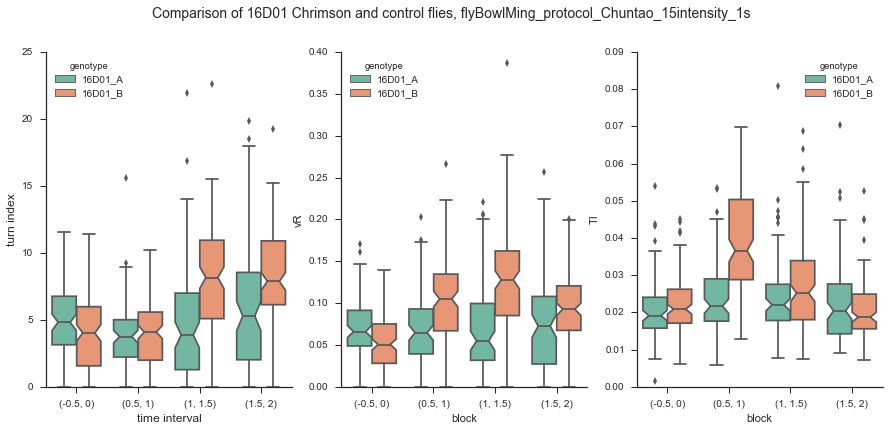

In [130]:
currentProtocol = 'flyBowlMing_protocol_Chuntao_30intensity_1s'

BoxPlotRed_df = BoxPlotAllFlies_df.query('(protocol=="'+currentProtocol+'")')
notchFlag = True
boxPlotFig = plt.figure(figsize=(15,6))
sns.set_style('ticks')
ax1 = boxPlotFig.add_subplot(131)
ax1 = sns.boxplot(x='block', y='vT', hue='genotype', data=BoxPlotRed_df,palette='Set2',notch=notchFlag)
#ax1 = sns.swarmplot(x="block", y="vT", hue="genotype", data=BoxPlotRed_df, color=".5")  #may require seaborn update
ax1.set_ylabel('translational velocity (mm/s)',fontsize=12)
ax1.set_xlabel('time interval',fontsize=12)
sns.despine()
ax2 = boxPlotFig.add_subplot(132)
ax2 = sns.boxplot(x='block', y='vR', hue='genotype', data=BoxPlotRed_df,palette='Set2',notch=notchFlag)
ax1.set_ylabel('abs. rotational velocity (deg/s)',fontsize=12)
ax1.set_xlabel('time interval',fontsize=12)
sns.despine()
ax3 = boxPlotFig.add_subplot(133)
ax3 = sns.boxplot(x='block', y='TI', hue='genotype', data=BoxPlotRed_df,palette='Set2',notch=notchFlag)
ax1.set_ylabel('turn index',fontsize=12)
ax1.set_xlabel('time interval',fontsize=12)
sns.despine()
ttl = boxPlotFig.suptitle('Comparison of '+genotype[:-2] + ' Chrimson and control flies, ' + protocolName, y=1.005,fontsize=14)
boxPlotFig.savefig(analysisDir + genotype[:-2] + '_' + currentProtocol + '_boxplotComparison.pdf', format = 'pdf',
                   bbox_extra_artists=(ttl,), bbox_inches='tight')

### Produce average response time-course plots (single experiment averages and overall average)

In [53]:
# Single genotype analysis
rootDir = '/Volumes/jayaraman/Chuntao/Ming_FlyBowl/Lori_CsChrimson_Screen/'
analysisDir = '/Volumes/jayaraman/Hannah/Analysis_FlyBowl_forSymposium/'
lineName = 'SS00098_A_flyBowlMing_protocol_Chuntao_15intensity'

expList = [filepath.split(sep)[-1] for filepath in glob(rootDir + sep + '*'+lineName+'*')]
sorted(expList)

['SS00098_A_flyBowlMing_protocol_Chuntao_15intensity_1s_20151123T101342',
 'SS00098_A_flyBowlMing_protocol_Chuntao_15intensity_1s_20151124T104409',
 'SS00098_A_flyBowlMing_protocol_Chuntao_15intensity_1s_20151124T105427',
 'SS00098_A_flyBowlMing_protocol_Chuntao_15intensity_1s_20151125T111045']

SS00098_A_flyBowlMing_protocol_Chuntao_15intensity_1s_20151124T104409
SS00098_A_flyBowlMing_protocol_Chuntao_15intensity_1s_20151124T105427
SS00098_A_flyBowlMing_protocol_Chuntao_15intensity_1s_20151123T101342
SS00098_A_flyBowlMing_protocol_Chuntao_15intensity_1s_20151125T111045


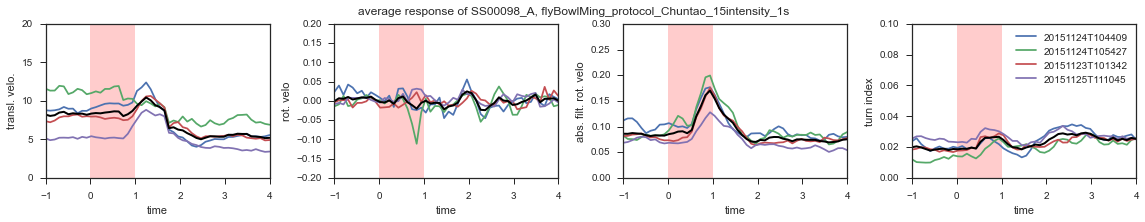

In [54]:
sns.set_style("ticks")
legendText = []
#cNorm  = colors.Normalize(vmin=0, vmax=len(expList))
#timeCMap = plt.cm.ScalarMappable(norm=cNorm,cmap='Spectral')

expCompFig = plt.figure(figsize=((16,3)))
expCompPlt1 = expCompFig.add_subplot(141)
expCompPlt2 = expCompFig.add_subplot(142)
expCompPlt3 = expCompFig.add_subplot(143)
expCompPlt4 = expCompFig.add_subplot(144)

allMeanTransV = []
allMeanRotV = []
allMeanAbsRotV_filt = []
allMeanAbsTurnInd = []

for currDir in range(len(expList)):
    folder = expList[currDir]
    print(folder)
    
    fileNameParts = folder.split('_')
    genotype = '_'.join(fileNameParts[0:fileNameParts.index('flyBowlMing')])
    protocolName = '_'.join(fileNameParts[fileNameParts.index('flyBowlMing'):-1])
    experiment = '_'.join(fileNameParts[fileNameParts.index('flyBowlMing'):])
    timestamp = fileNameParts[-1]

    meanRespMyLine = np.load(analysisDir + genotype + sep + protocolName + sep + timestamp + sep + folder + '_meanResponses.npy')
    meanRespMyLine = meanRespMyLine.item()
    
    expCompPlt1.plot(meanRespMyLine['time'],meanRespMyLine['meanTransV'])
    expCompPlt2.plot(meanRespMyLine['time'],meanRespMyLine['meanRotV'])
    expCompPlt3.plot(meanRespMyLine['time'],meanRespMyLine['meanAbsRotV_filt'])
    expCompPlt4.plot(meanRespMyLine['time'],meanRespMyLine['meanAbsTurnInd'])
    
    legendText.append(folder.split('_')[-1])
    
    allMeanTransV.append(meanRespMyLine['meanTransV'])
    allMeanRotV.append(meanRespMyLine['meanRotV'])
    allMeanAbsRotV_filt.append(meanRespMyLine['meanAbsRotV_filt'])
    allMeanAbsTurnInd.append(meanRespMyLine['meanAbsTurnInd'])

expCompPlt1.plot(meanRespMyLine['time'],np.mean(np.asarray(allMeanTransV),0),'k',linewidth = 2)
expCompPlt2.plot(meanRespMyLine['time'],np.mean(np.asarray(allMeanRotV),0),'k',linewidth = 2)
expCompPlt3.plot(meanRespMyLine['time'],np.mean(np.asarray(allMeanAbsRotV_filt),0),'k',linewidth = 2)
expCompPlt4.plot(meanRespMyLine['time'],np.mean(np.asarray(allMeanAbsTurnInd),0),'k',linewidth = 2)


def formatSubplots(sph, xlab, ylab,ylim):
    sph.set_xlabel(xlab)
    sph.set_ylabel(ylab)
    sph.set_ylim(ylim)
    sph.yaxis.set_ticks_position('left')
    sph.xaxis.set_ticks_position('bottom')
    sph.add_patch(patches.Rectangle((0,-1), 1, 30, alpha = 0.2, facecolor = 'red', edgecolor = 'none'))

formatSubplots(expCompPlt1, 'time', 'transl. velo.',(0,20))
formatSubplots(expCompPlt2, 'time', 'rot. velo',(-0.2,0.2))
formatSubplots(expCompPlt3, 'time', 'abs. filt. rot. velo',(0, 0.3))
formatSubplots(expCompPlt4, 'time', 'turn index',(0, 0.1))

expCompPlt4.legend(legendText)

expCompFig.tight_layout()
ttl = expCompFig.suptitle('average response of '+genotype + ', ' + protocolName, y=1.01,fontsize=12)
expCompFig.savefig(analysisDir + genotype + sep + protocolName + sep + genotype + '_' + protocolName + '_summary.pdf', format = 'pdf',
                   bbox_extra_artists=(ttl,), bbox_inches='tight')

### Script collecting summary statistic data from each experiment

In [41]:
def singleExperimentReducedAnalysis(folder):
    
    #matFlyBowl = [filepath.split(sep)[-1] for filepath in glob(rootDir + dateDir + sep + folder + sep + '*.mat')]
    matFlyBowl = [filepath.split(sep)[-1] for filepath in glob(rootDir + sep + folder + sep + '*.mat')]
    matFlyBowl = sorted(matFlyBowl)

    print('\n Analysing the following log files in '+expList[currDir]+':\n')
    print(matFlyBowl)

    fileNameParts = folder.split('_')

    genotype = '_'.join(fileNameParts[0:fileNameParts.index('flyBowlMing')])
    protocolName = '_'.join(fileNameParts[fileNameParts.index('flyBowlMing'):-1])
    experiment = '_'.join(fileNameParts[fileNameParts.index('flyBowlMing'):])
    timestamp = fileNameParts[-1]

    print(genotype)
    print(experiment)

    plotSaveDir = analysisDir + genotype + sep + protocolName + sep + timestamp

    try:
        os.mkdir(analysisDir + genotype )
    except OSError:
        print('Genotype folder already exists')

    try:
        os.mkdir(analysisDir + genotype + sep + protocolName)
    except OSError:
        print('Protocol folder already exists')

    try:
        os.mkdir(plotSaveDir)
    except OSError:
        print('Experiment folder already exists')


    # Import and rearrange data ...........................................................................................
    fileName = 'ctrax_results'

    # Extract relevant tracking parameter
    keyList = ['timestamps','x_pos','y_pos','ntargets','identity','angle'] #data columns to be extracted from ctrax file

    #load matlab data and convert
    #indat = loadmat(rootDir + dateDir + sep + folder + sep + fileName + '.mat')
    indat = loadmat(rootDir + folder + sep + fileName + '.mat')

    dat = [indat[k] for k in keyList]

    # Reorganise fly position arrays into lists (sorted by frame)
    numFrames = len(dat[0])
    xPos = []
    yPos = []
    angle = []
    flyID = []

    pointer = 0
    for t in range(numFrames):
        numFlies = dat[3][t].astype('int')[0]

        xPos.append(dat[1][pointer:pointer+numFlies])
        yPos.append(dat[2][pointer:pointer+numFlies])
        angle.append(dat[5][pointer:pointer+numFlies])
        flyID.append(dat[4][pointer:pointer+numFlies])

        pointer += numFlies

    xPos = np.array(xPos)
    yPos = np.array(yPos)
    angle = np.array(angle)
    flyID = np.array(flyID)
    maxFlyID = max(dat[4])

    # Reorganise fly track fragments into matrix (frame x fly id )
    flyIDperFrame = np.zeros((numFrames,maxFlyID+1))
    for frame in range(numFrames):
        for idx in np.array(flyID[frame]).squeeze().astype('int'):
            flyIDperFrame[frame][idx] = 1


    # Extract protocol parameter ......................................................................................
    #protocol = loadmat(rootDir + dateDir + sep + folder + sep + 'protocol.mat') #load protocol parameter
    protocol = loadmat(rootDir + folder + sep + 'protocol.mat') #load protocol parameter
    protocol = protocol['protocol'] #extract values from dict

    intensity = protocol['intensity'].squeeze().astype('int')
    pulseWidth = protocol['pulseWidthSP'].squeeze().astype('int')
    pulsePeriod = protocol['pulsePeriodSP'].squeeze().astype('int')
    stimTms = pulseWidth
    pauseTms = protocol['offTime'].squeeze().astype('int')
    numRepeat = protocol['iteration'].squeeze().astype('int')
    delayStart = protocol['delayTime'].squeeze().astype('int')

    stimCycle = (stimTms+pauseTms)/1000

    # total length of protocol
    experimentT = (delayStart + numRepeat*stimCycle*fps)

    skipFrame = 3 #downsample from 30Hz --> 10Hz

    #Build indicator vector for red light stimulation
    stimBlock = np.hstack((np.ones((stimTms/1000)*fps),np.zeros((pauseTms/1000) * fps)))
    stimCode = np.tile(stimBlock,numRepeat)

    trialBlock = np.ones(((stimTms+pauseTms)/1000)*fps)
    trialCode = np.repeat(range(1,numRepeat+1),((stimTms+pauseTms)/1000)*fps)

    trialBegin = [(k*(stimTms+pauseTms)/1000.0)*fps/skipFrame for k in range(numRepeat)]
    trialBlockPts = ((stimTms+pauseTms)/1000.0)*fps/skipFrame
    trialBlockT = np.linspace(0,(stimTms+pauseTms)/1000.0,trialBlockPts)


    # Compute translational and rotational velocity over entire experiment ............................................
    frameRange = range((delayStart)*fps,(delayStart + numRepeat*((stimTms+pauseTms)/1000)) * fps,skipFrame)
    activeFragments = np.array(np.nonzero(sum(flyIDperFrame[frameRange]))).squeeze()

    transV = np.zeros((len(frameRange),len(activeFragments)))
    transV_filt = np.zeros((len(frameRange),len(activeFragments)))
    rotV = np.zeros((len(frameRange),len(activeFragments)))
    rotV_filt = np.zeros((len(frameRange),len(activeFragments)))

    for k, fly in enumerate(activeFragments):

        currTransV = np.zeros((len(frameRange),1))
        currRotV = np.zeros((len(frameRange),1))

        for ind,frame in enumerate(frameRange):
            if((not np.any(flyID[frame] == fly)) or (not np.any(flyID[frame-skipFrame] == fly))):
                continue;

            currTransV[ind] = np.hypot(xPos[frame][flyID[frame] == fly] - xPos[frame-skipFrame][flyID[frame-skipFrame] == fly],
                                      yPos[frame][flyID[frame] == fly] - yPos[frame-skipFrame][flyID[frame-skipFrame] == fly])

            currRotV[ind] = angle[frame][flyID[frame] == fly] - angle[frame-skipFrame][flyID[frame-skipFrame] == fly]
            if(currRotV[ind]>np.pi): currRotV[ind] = currRotV[ind]-2*np.pi
            if(currRotV[ind]<-np.pi): currRotV[ind] = currRotV[ind]+2*np.pi

        transV[:,k] = currTransV.squeeze()
        transV_filt[:,k] = np.convolve(currTransV.squeeze(), np.ones((5,))/5, mode='same')
        rotV[:,k] = currRotV.squeeze()
        rotV_filt[:,k] = np.convolve(currRotV.squeeze(), np.ones((5,))/5, mode='same')


    # (3) Visualise responses triggered on light ON

    windowPreMS = 1000
    windowPostMS = 3000
    stimDurationS = stimTms/1000
    #Note: to be able to look at pre-stimulus window, the first trial is not regarded
    trialBegin = [((k+1)*(stimTms+pauseTms)/1000.0)*fps/skipFrame for k in range(numRepeat-1)]
    trialWindowBlockPts = ((stimTms+windowPreMS+windowPostMS)/1000.0)*fps/skipFrame
    trialWindowBlockT = np.linspace(-windowPreMS/1000.0,(stimTms+windowPostMS)/1000.0,trialWindowBlockPts)
    plotBegin = [trialBegin[i]-windowPreMS/1000.0*fps/skipFrame for i in range(len(trialBegin))]


    #compute average responses (average over trials and flies)
    turnInd = rotV_filt/transV_filt
    meanTransV = np.mean([np.nanmean(transV[plotBegin[i]:plotBegin[i]+len(trialWindowBlockT), :], 1) for i in range(len(plotBegin))],0)
    meanTransV_filt = np.mean([np.nanmean(transV_filt[plotBegin[i]:plotBegin[i]+len(trialWindowBlockT), :], 1) for i in range(len(plotBegin))],0)
    meanTurnInd = np.mean([np.nanmean(turnInd[plotBegin[i]:plotBegin[i]+len(trialWindowBlockT), :], 1) for i in range(len(plotBegin))],0)
    meanAbsTurnInd = np.mean([np.nanmean(abs(turnInd[plotBegin[i]:plotBegin[i]+len(trialWindowBlockT), :]), 1) for i in range(len(plotBegin))],0)
    meanRotV = np.mean([np.nanmean(rotV[plotBegin[i]:plotBegin[i]+len(trialWindowBlockT), :], 1) for i in range(len(plotBegin))],0)
    meanRotV_filt = np.mean([np.nanmean(rotV_filt[plotBegin[i]:plotBegin[i]+len(trialWindowBlockT), :], 1) for i in range(len(plotBegin))],0)
    meanAbsRotV_filt = np.mean([np.nanmean(abs(rotV_filt[plotBegin[i]:plotBegin[i]+len(trialWindowBlockT), :]), 1) for i in range(len(plotBegin))],0)

    #collect mean responses for later line/experiment comparison
    meanRespPerLine = {
        'time': trialWindowBlockT,
        'meanTransV': meanTransV,
        'meanTransV_filt': meanTransV_filt,
        'meanTurnInd': meanTurnInd,
        'meanAbsTurnInd': meanAbsTurnInd,
        'meanRotV': meanRotV,
        'meanRotV_filt': meanRotV_filt,
        'meanAbsRotV_filt':meanAbsRotV_filt
    }

    np.save(plotSaveDir + '/' + genotype + '_' + experiment + '_meanResponses', meanRespPerLine)


    # Compute binned averages of pre, during and post stimulation
    timeWindows = ((-0.5,0),(0.5,1),(1,1.5),(1.5,2))
    blockNames = ['(-0.5, 0)','(0.5, 1)','(1, 1.5)','(1.5, 2)']
    #timeWindows = ((-0.5,0),(0,0.5),(0.5,1),(1,1.5),(1.5,2))
    #blockNames = ['(-0.5, 0)','(0, 0.5)','(0.5, 1)','(1, 1.5)','(1.5, 2)']
    blockSize = (timeWindows[0][1]-timeWindows[0][0])*10
    numBlocks = len(timeWindows)
    
    perFlyAvVT = np.nan*np.ones((len(activeFragments),numBlocks))
    perFlyAvVR = np.nan*np.ones((len(activeFragments),numBlocks))
    perFlyAvTI = np.nan*np.ones((len(activeFragments),numBlocks))
    
    for fly in activeFragments:
        try:
            for block in range(numBlocks):
                perFlyVT = np.zeros((numBlocks, blockSize, len(plotBegin)))
                perFlyVR = np.zeros((numBlocks, blockSize, len(plotBegin)))
                perFlyTI = np.zeros((numBlocks, blockSize, len(plotBegin)))
                for i in range(len(trialBegin)):
                    blockBegin = timeWindows[block][0]*10
                    
                    perFlyVT[block,:,i] = transV[trialBegin[i]+blockBegin:trialBegin[i]+blockBegin+blockSize,fly]
                    perFlyVR[block,:,i] = abs(rotV_filt[trialBegin[i]+blockBegin:trialBegin[i]+blockBegin+blockSize,fly])
                    perFlyTI[block,:,i] = abs(rotV_filt[trialBegin[i]+blockBegin:trialBegin[i]+blockBegin+blockSize,fly]/\
                                            transV_filt[trialBegin[i]+blockBegin:trialBegin[i]+blockBegin+blockSize,fly])

                perFlyAvVT[fly,block] = np.mean(np.nanmean(perFlyVT[block,:,:],1),0)
                perFlyAvVR[fly,block] = np.mean(np.nanmean(perFlyVR[block,:,:],1),0)
                perFlyAvTI[fly,block] = np.mean(np.nanmean(perFlyTI[block,:,:],1),0)

        except:
            print('problem with trace fragment of fly' + str(fly))

    perFlyBPVT = np.zeros(len(activeFragments)*numBlocks)
    perFlyBPVR = np.zeros(len(activeFragments)*numBlocks)
    perFlyBPTI = np.zeros(len(activeFragments)*numBlocks)
    
    for block in range(numBlocks):
        perFlyBPVT[len(activeFragments)*block:len(activeFragments)*(block+1)] = perFlyAvVT[:,block]
        perFlyBPVR[len(activeFragments)*block:len(activeFragments)*(block+1)] = perFlyAvVR[:,block]
        perFlyBPTI[len(activeFragments)*block:len(activeFragments)*(block+1)] = perFlyAvTI[:,block]
        
    import itertools
    blockNameList = list(itertools.chain.from_iterable(itertools.repeat(x, len(activeFragments)) for x in blockNames))
    
    # reshape average block data
    boxPlotData = {
        'block': blockNameList, #np.repeat(range(numBlocks),len(activeFragments)),
        'vT': np.asarray(perFlyBPVT),
        'vR': np.asarray(perFlyBPVR),
        'TI': np.asarray(perFlyBPTI)
    }

    np.save(plotSaveDir + '/' + genotype + '_' + experiment + '_boxPlot', boxPlotData)


    # Visualisation of trajectories from 'extreme flies' 
    maxRotFly = np.nanargmax(abs(perFlyAvVR[:,1]),axis=0)
    maxVFly = np.nanargmax(perFlyAvVT[:,1],axis=0)
    minVFly = np.nanargmax(abs(perFlyAvVT[:,1]-perFlyAvVT[:,2]),axis=0)
    maxTIFly = np.nanargmax(abs(perFlyAvTI[:,1]),axis=0)

    # Run more detailed analysis on 'extreme flies'
    def visualiseSingleFlyTraces(fly, flyName):
        skipFrame = 2
        fullExperiment = range(delayStart*fps,(delayStart + numRepeat*((stimTms+pauseTms)/1000)) * fps,skipFrame)
        stimCodeFrames = stimCode[range(0,len(stimCode),skipFrame)]
        trialCodeFrames = trialCode[range(0,len(trialCode),skipFrame)]

        fig=plt.figure(figsize=(10,10))

        posPlt = fig.add_subplot(111)
        posPlt.set_title('fly' + str(fly))
        plotPosAndAngleInRange_singleFly_colorStim(posPlt,fullExperiment,stimCodeFrames,xPos,yPos,angle,flyID,fly,'Greys')
        posPlt.yaxis.set_ticks_position('left')
        posPlt.xaxis.set_ticks_position('bottom')
        fig.savefig(plotSaveDir+sep+genotype+'_'+experiment+'_'+flyName+'_fly'+str(fly)+'_trace.pdf', format='pdf')

        trialBegin_traces = [(delayStart + k*(stimTms+pauseTms)/1000)*fps for k in range(numRepeat)]
        trialBegin_traces = [(delayStart + k*(stimTms+pauseTms)/1000)*fps for k in range(numRepeat)]
        windowSize = 3
        skipFrame = 2
        stimFrames = stimTms/1000 * fps
        preStimFrames = (windowSize-2)*fps
        postStimFrames = windowSize*fps
        colorRange = ['grey','orangered','darkred']

        currCmap = 'nipy_spectral'
        fig = plt.figure(figsize=(11,6))
        fig.suptitle(str(stimTms/1000)+' s stimulation trajecotories ('+str(windowSize-2)+' s pre, '+str(windowSize)+' s post) of fly '
                     +str(fly)+'\n' + genotype+', '+protocolName,  fontsize = 12)
        plotPosAndAngleInRange_singleFly_separateTrials3(fig,trialBegin_traces,numRepeat,stimFrames,preStimFrames,postStimFrames,skipFrame,
                                         xPos,yPos,angle,fly,flyID,colorRange)
        fig.savefig(plotSaveDir+sep+genotype+'_'+experiment+ '_'+flyName+'_perTrialfly'+str(fly)+'.pdf', format='pdf')


    visualiseSingleFlyTraces(maxRotFly, 'maxVRot')
    visualiseSingleFlyTraces(maxVFly, 'maxVTrans')
    visualiseSingleFlyTraces(minVFly, 'minVTrans')
    visualiseSingleFlyTraces(maxTIFly, 'maxTurnInd')